In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
sys.path.append("../")
from gplot_tool import *
from pltconfig import config_plt

config_plt()

## Extracting a Path From a Walk

In [2]:
def extract_path_from_walk(walk: str) -> str:
    walk = list(walk)
    k = int((len(walk) - 1) / 2)
    path = [walk[0]]
    for i in range(1, k + 1):
        v = walk[2 * i]
        e = walk[2 * i - 1]
        if v not in path:
            path.append(e)
            path.append(v)
        else:
            j = path.index(v)
            path = path[:j+1]
    path = "".join(path)
    return path

In [3]:
walk = "uavfyfvgyhwbv"
walk = "1a4b3c2d3e8f6g3"
extract_path_from_walk(walk)

'1a4b3'

## The Longest Path Technique 

In [4]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(5, 6)
G.add_edge(6, 7)
G.add_edge(7, 5)
G.add_edge(7, 2)
G.add_edge(7, 8)

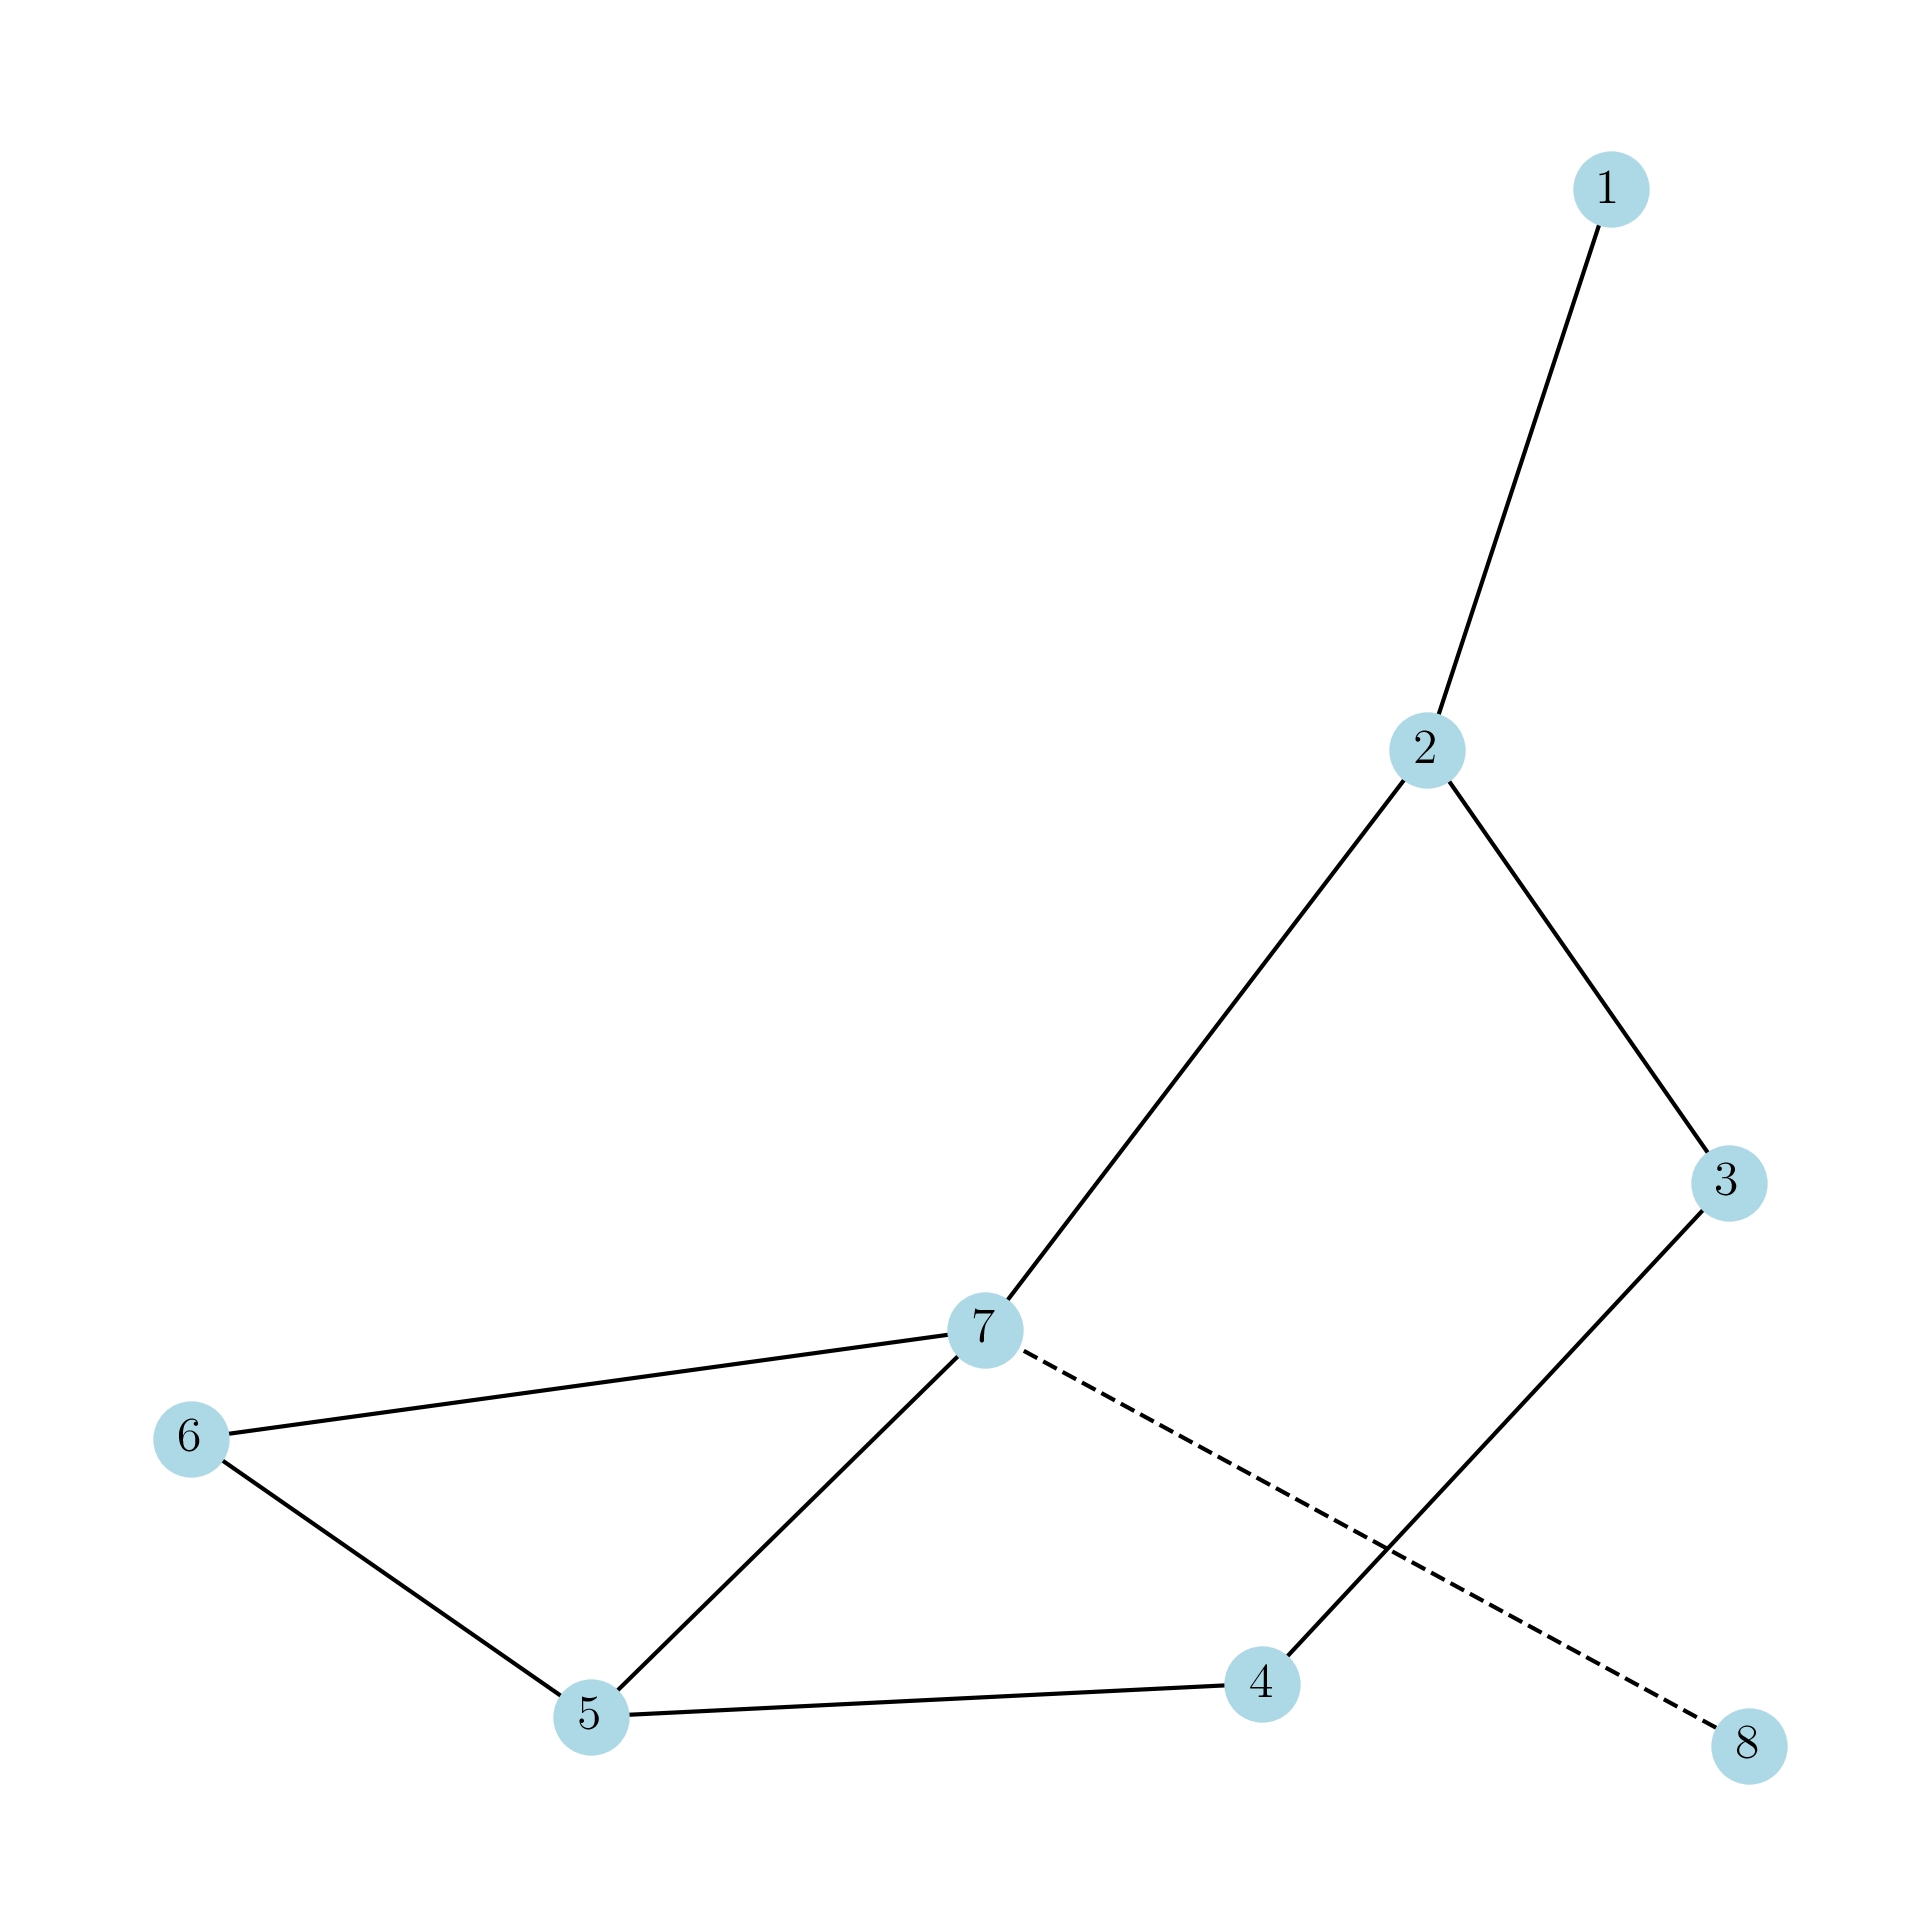

In [5]:
np.random.seed(3)
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(
    G, pos,
    ax=ax,
    node_color="lightblue"
)
nx.draw_networkx_labels(
    G, pos,
    ax=ax
)
edges = list(G.edges)
nx.draw_networkx_edges(
    G, pos,
    ax=ax,
    edgelist=edges[:-1]
)
nx.draw_networkx_edges(
    G, pos,
    ax=ax,
    edgelist=[edges[-1]],
    style="--"
)
ax.set_frame_on(False)
plt.savefig(
    "../../tex/figures/g-001.png",
    bbox_inches="tight",
    pad_inches=0
)
plt.show()

## Cutting an Edge

In [6]:
G = nx.Graph()

G.add_edge(1, 2, weight=1)
G.add_edge(2, 3, weight=1)
G.add_edge(3, 1, weight=1)

G.add_edge(2, 4, weight=5)

G.add_edge(4, 5, weight=1)
G.add_edge(5, 6, weight=1)
G.add_edge(6, 7, weight=1)
G.add_edge(7, 4, weight=3)

G.add_edge(8, 9, weight=1)
G.add_edge(9, 10, weight=1)
G.add_edge(10, 8, weight=1)

G.add_edge(2, 8, weight=10)
G.add_edge(7, 10, weight=3)

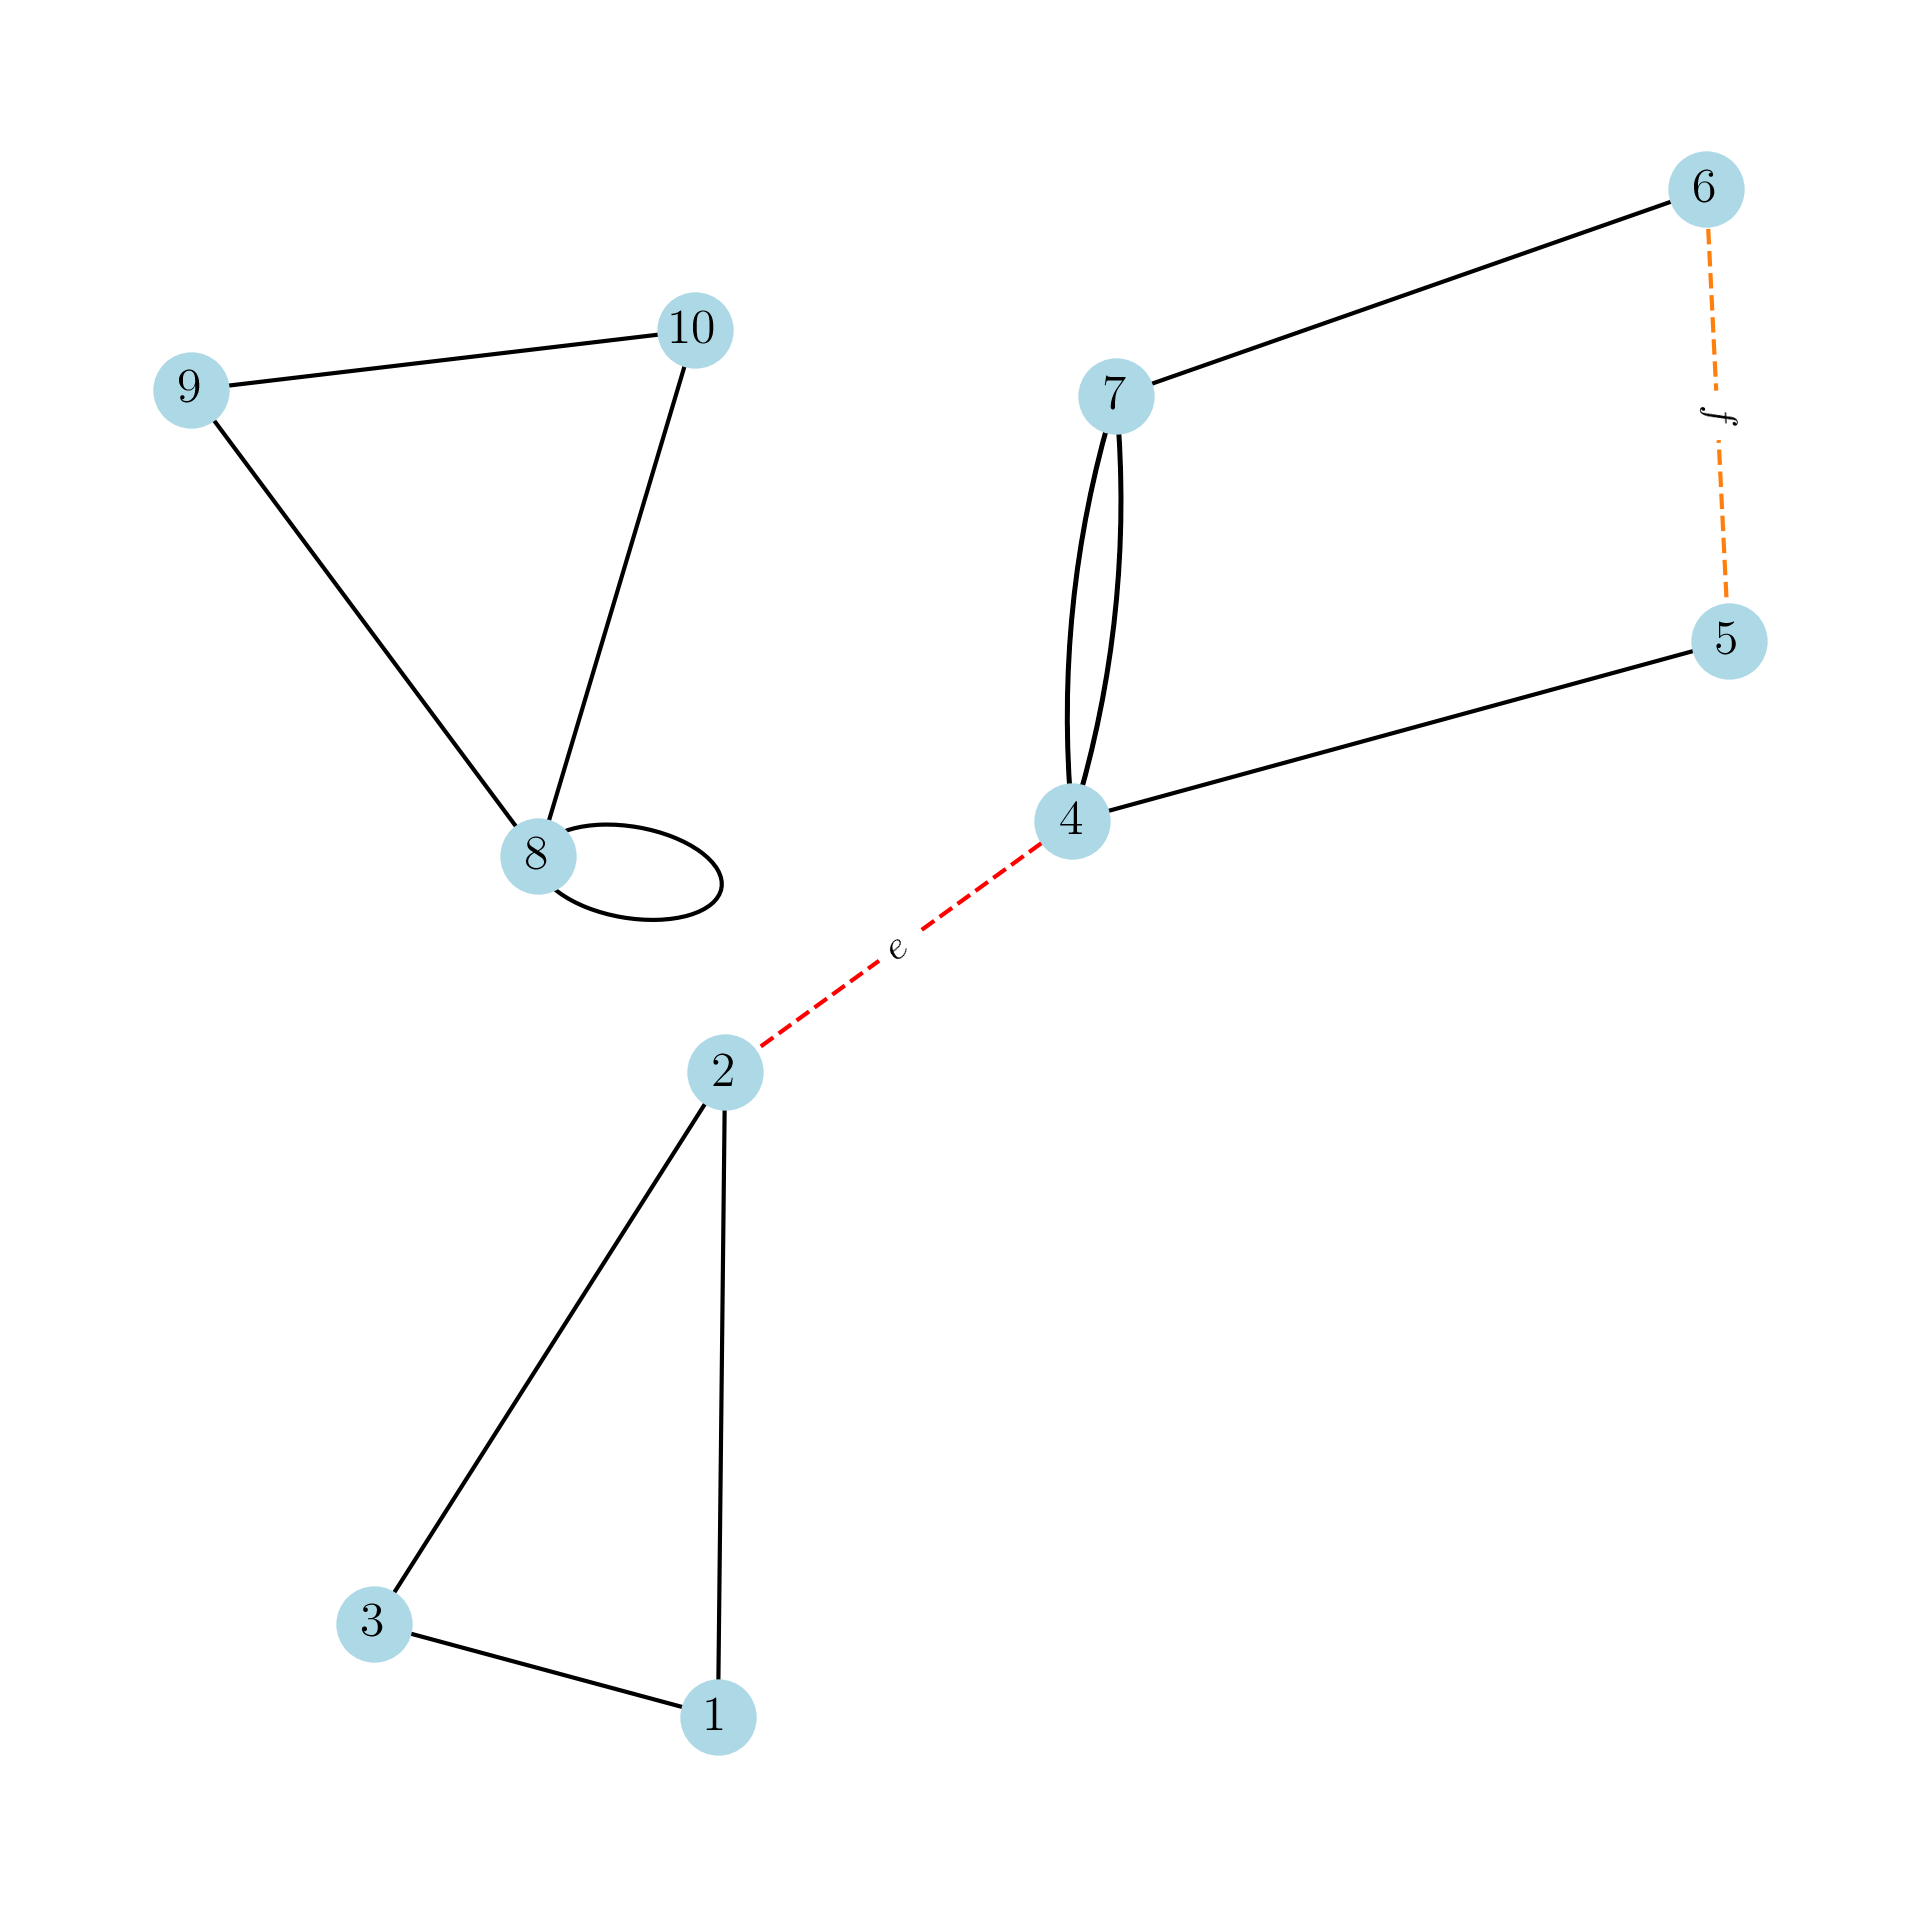

In [7]:
np.random.seed(0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(
    G, pos,
    ax=ax,
    node_color="lightblue"
)
nx.draw_networkx_labels(
    G, pos,
    ax=ax
)

edges = set(G.edges)

nx.draw_networkx_edges(
    G, pos,
    ax=ax,
    edgelist=edges-{(2, 4), (5, 6), (4, 7), (2, 8), (7, 10)},
)

# loop
add_loop(
    pos[8], 
    width=0.2,
    angle=-10,
    ax=ax
)

# parallel edges
par_e47_1 = patches.FancyArrowPatch(
    pos[4], pos[7],
    connectionstyle="arc3, rad=.1",
)
par_e47_2 = patches.FancyArrowPatch(
    pos[4], pos[7],
    connectionstyle="arc3, rad=-0.1",
)
ax.add_patch(par_e47_1)
ax.add_patch(par_e47_2)

# edge 24
nx.draw_networkx_edges(
    G, pos,
    ax=ax,
    edgelist=[(2, 4)],
    style="--",
    edge_color="red"
)

#edge 56
nx.draw_networkx_edges(
    G, pos,
    ax=ax,
    edgelist=[(5, 6)],
    style="--",
    edge_color="C1"
)

# edge labels
nx.draw_networkx_edge_labels(
    G, pos, 
    edge_labels={(5, 6) : "$f$"}
)

nx.draw_networkx_edge_labels(
    G, pos, 
    edge_labels={(2, 4) : "$e$"}
)

ax.set_frame_on(False)
plt.savefig(
    "../../tex/figures/g-005.png",
    bbox_inches="tight",
    pad_inches=0
)
plt.show()

## Connected Graphs with Minimum Number of Edges

In [8]:
T1 = nx.Graph()
T1.add_edge(1, 2)
T1.add_edge(2, 3)
T1.add_edge(3, 4)
T1.add_edge(4, 5)
T1.add_edge(5, 6)

T2 = nx.Graph()
T2.add_edge(1, 2)
T2.add_edge(2, 3)
T2.add_edge(2, 4)
T2.add_edge(4, 5)
T2.add_edge(5, 6)

T3 = nx.Graph()
T3.add_edge(1, 2)
T3.add_edge(2, 3)
T3.add_edge(3, 4)
T3.add_edge(3, 5)
T3.add_edge(5, 6)

T4 = nx.Graph()
T4.add_edge(1, 2)
T4.add_edge(2, 3)
T4.add_edge(2, 4)
T4.add_edge(4, 5)
T4.add_edge(4, 6)

T5 = nx.Graph()
T5.add_edge(1, 2)
T5.add_edge(2, 3)
T5.add_edge(2, 4)
T5.add_edge(2, 5)
T5.add_edge(5, 6)

T6 = nx.Graph()
T6.add_edge(1, 2)
T6.add_edge(1, 3)
T6.add_edge(1, 4)
T6.add_edge(1, 5)
T6.add_edge(1, 6)

trees = [T1, T2, T3, T4, T5, T6]

for t in trees:
    for edge in t.edges:
        t.edges[edge]["weight"] = 1

In [9]:
def draw_tree(T: nx.Graph, ax: plt.Axes):
    
    pos = nx.spring_layout(T)
    
    nx.draw_networkx_nodes(
        T, pos,
        ax=ax,
        node_color="lightblue"
    )

    nx.draw_networkx_labels(
        T, pos,
        ax=ax
    )

    nx.draw_networkx_edges(
        T, pos,
        ax=ax,
        edgelist=T.edges,
    )

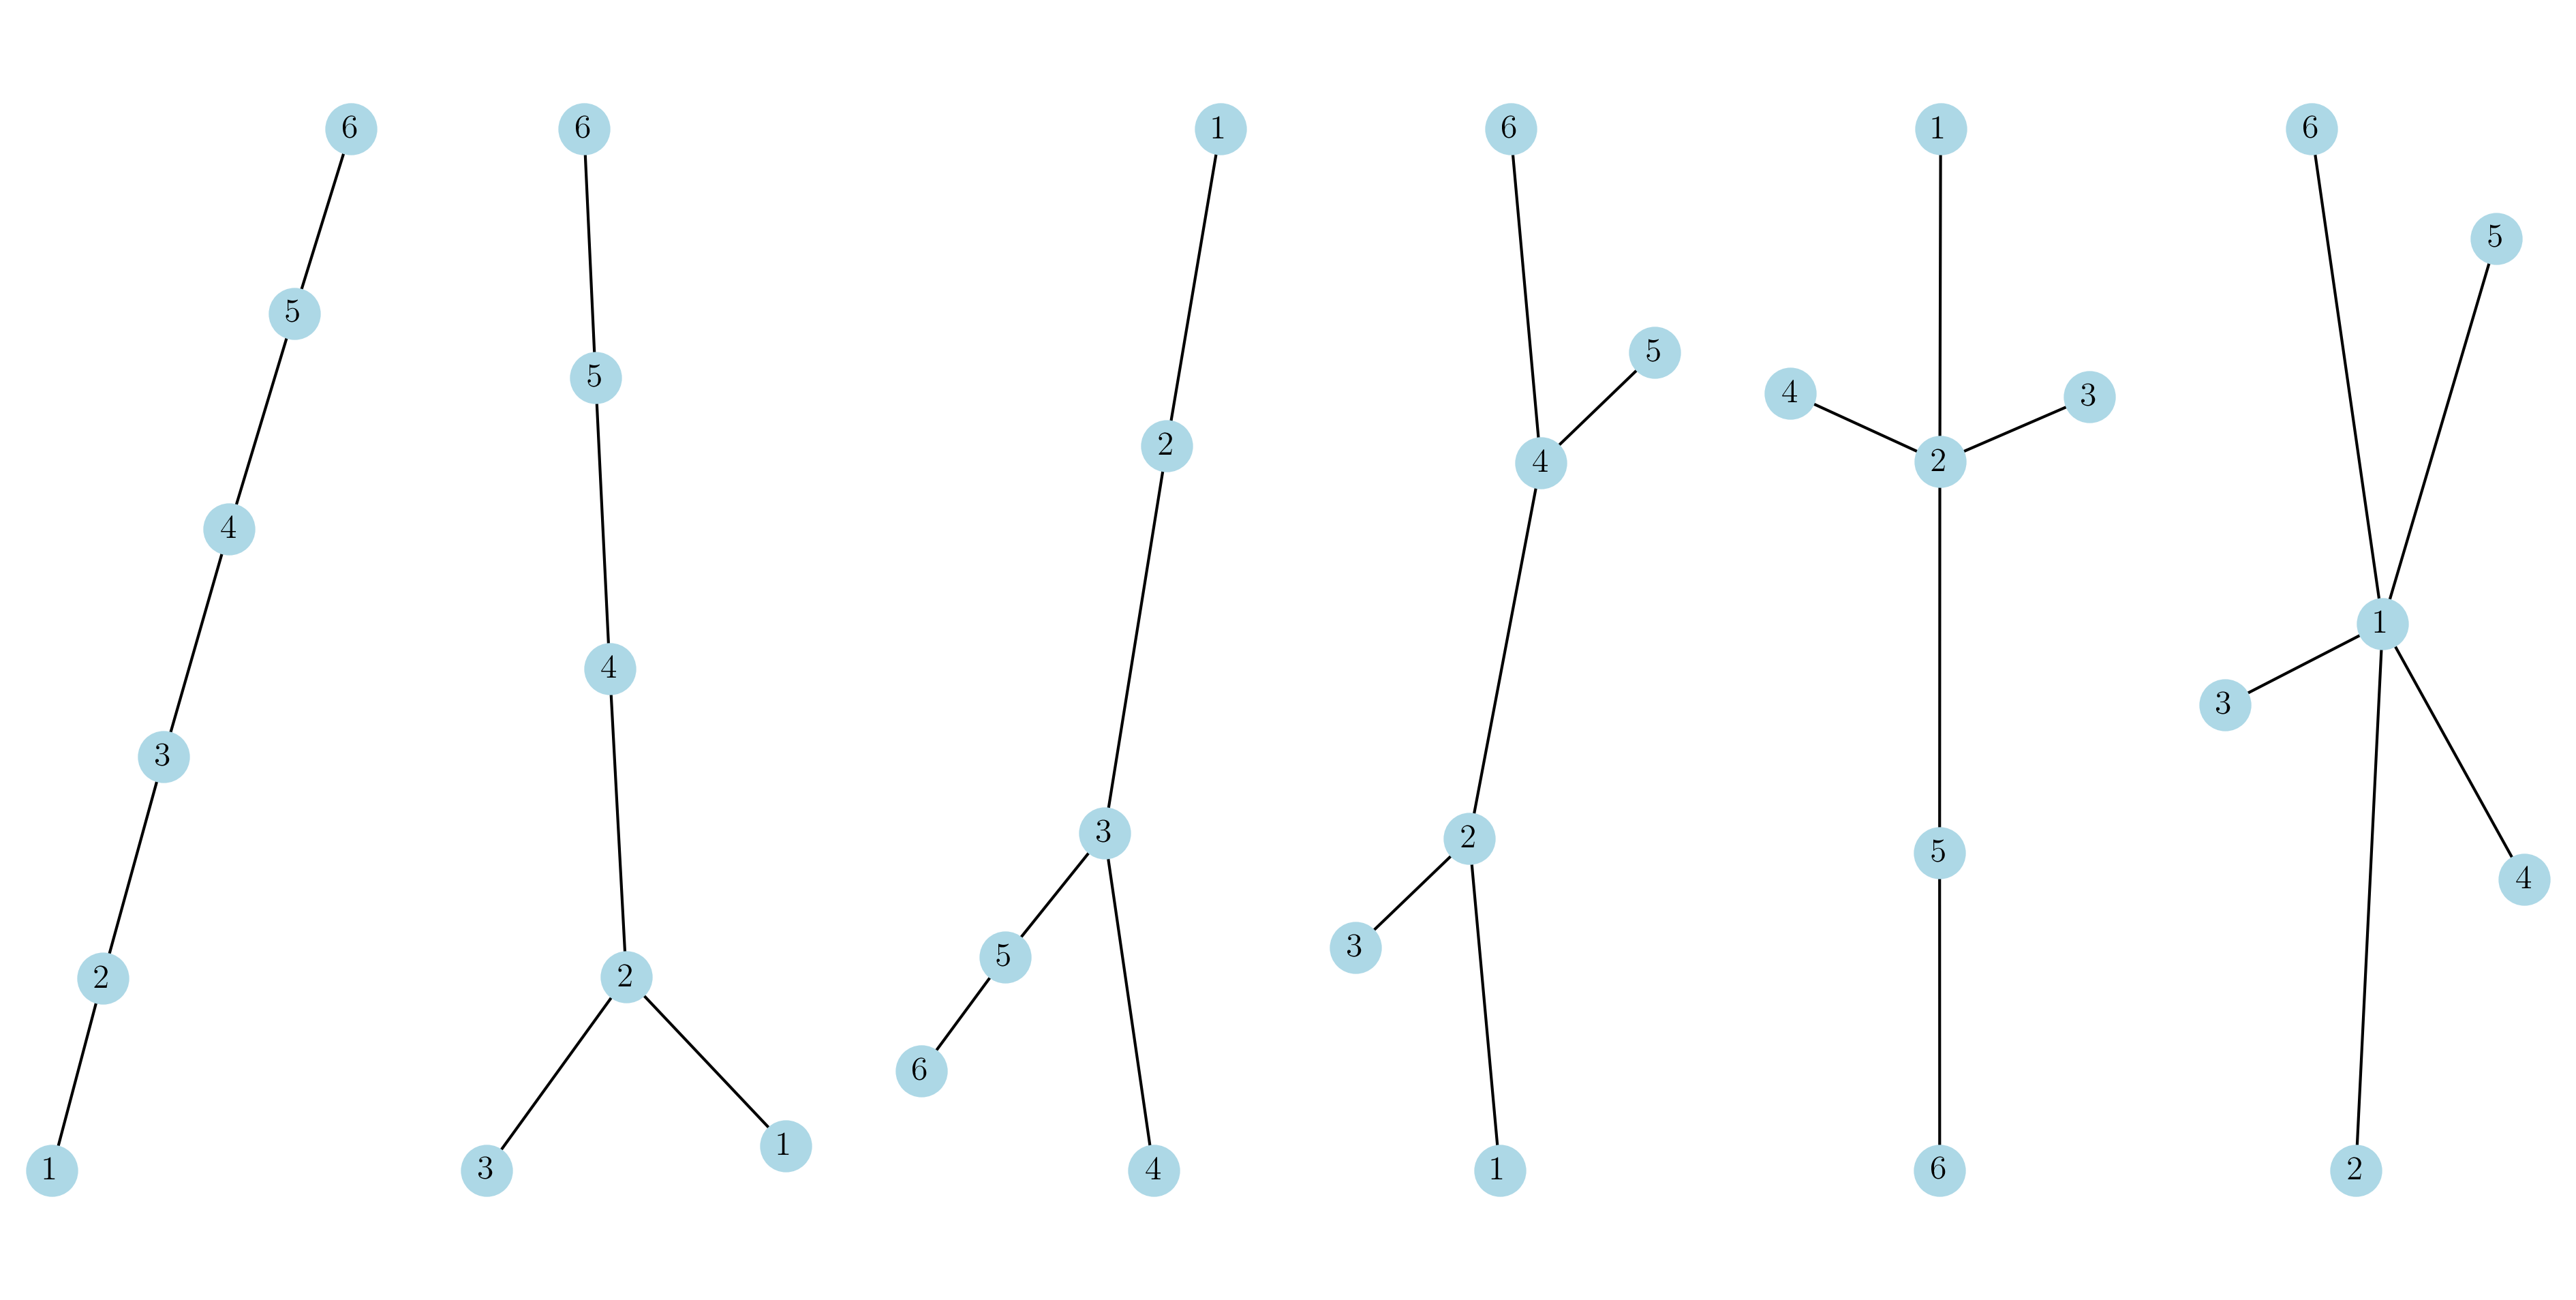

In [10]:
np.random.seed(40)
fig, axs = plt.subplots(1, 6, figsize=(16, 8), dpi=300)

for i in range(6):
    draw_tree(trees[i], axs[i])
    axs[i].set_frame_on(False)

plt.savefig(
    "../../tex/figures/g-006.png",
    bbox_inches="tight",
    pad_inches=0
)
plt.show()